# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\human_body_temperature.csv')

In [2]:
# Your work here.
# Is the distribution of the human body normal?
#It looks like we have 3 different columns: Temperature, gender, and heart_rate.  Let's check both genders just to be safe.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
dfmean = np.mean(df['temperature'])

In [4]:
dfstd = np.std(df['temperature'])

In [5]:
df.shape

(130, 3)

In [6]:
print(dfmean, dfstd)

98.24923076923078 0.7303577789050377


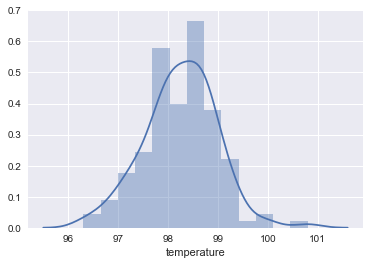

In [7]:
sns.distplot(df['temperature'])

In [8]:
dfmale = df[df['gender'] == 'M']

In [9]:
dfmmean = np.mean(dfmale['temperature'])

In [10]:
dfmstd = np.std(dfmale['temperature'])

In [11]:
dfmale.shape

(65, 3)

In [12]:
print(dfmmean, dfmstd)

98.1046153846154 0.6933598841828696


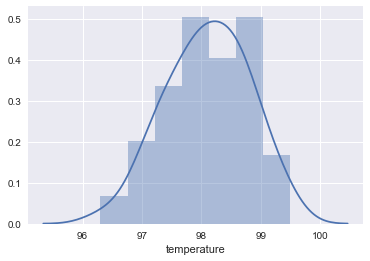

In [13]:
sns.distplot(dfmale['temperature'])

In [14]:
#Above we have the mean and standard deviation for all males.


In [15]:
dffemale = df[df['gender'] == 'F']

In [16]:
dffemalemean = np.mean(dffemale['temperature'])

In [17]:
dffstd = np.std(dffemale['temperature'])

In [18]:
dffemale.shape

(65, 3)

In [19]:
print(dffemalemean, dffstd)

98.39384615384613 0.7377464486428966


In [20]:
#Now that we have the distributions for all three data sets, we can start setting up our distributions.
#After we set up the plots, we will also a back of the envelope test to

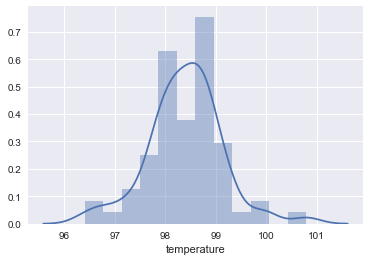

In [21]:
sns.distplot(dffemale['temperature'])

In [22]:
#All three distributions looks normal.  There is an outlier at above 100 but it isn't enough to mess with any of the averages.


In [23]:
##Is the sample size large enough?

In [24]:
df.shape

(130, 3)

In [25]:
dfmale.shape

(65, 3)

In [26]:
dffemale.shape

(65, 3)

In [27]:
## The same size for each group is above 30 so each will be large enough to use a z test

In [28]:
### Is the population mean really 98.6 degreegs?


In [29]:
###Bootstrap1d:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [30]:
###Bootstrap:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [31]:
### Bootstrap Overall:
draw_bs_reps(df['temperature'], np.mean, size=1)

array([98.20538462])

In [32]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df['temperature'], np.mean)

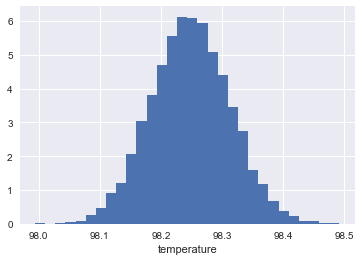

In [33]:
plt.hist(bs_replicates, bins=30, normed=True)
plt.xlabel('temperature')
plt.show()

In [34]:
### Uh-oh, according to our bootstrap plot, 98.6 is a pretty unlikely mean. It looks like the actual number is lower

In [35]:
print(dfmean, dfstd)

98.24923076923078 0.7303577789050377


In [36]:
dfz = stats.zscore(df['temperature'])

In [37]:
dfmew = np.mean(bs_replicates)

In [38]:
dfpopstd = np.std(bs_replicates)

In [39]:
print(dfmew, dfpopstd)

98.24858692307693 0.06451686276062535


In [40]:
z1 = (98.6 - dfmew) / dfpopstd

In [41]:
print(z1)
###This z score looks pretty improbable.  It doesn't look like the average human population is 98.6.  Let's look at the t test.

5.446840746533224


In [42]:
dft = stats.ttest_1samp(df['temperature'], 98.6)

In [43]:
dft1 = stats.ttest_1samp(df['temperature'], dfmean) 

In [44]:
dft
#With this p-value, we reject the null that the true population mean is 98.6.  The population mean is significantly different.

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [106]:
dft1
##With the p-value being greater than 0.05, we fail to reject the null that the true population mean is different from dfmean

Ttest_1sampResult(statistic=-4.419868934050681e-13, pvalue=0.9999999999996481)

In [45]:
###  ## Because of the large sample size, we will use the z-test for all three data sets.  
### ## Since the actual population mean could be higher or lower, we want to use a two-tailed test
dfz = stats.zscore(df['temperature'])

In [46]:
dfz

array([ 1.43870478,  0.20643202, -0.61508316,  1.30178559, -0.34124477,
        1.30178559, -0.34124477,  0.7541088 ,  0.20643202,  0.48027041,
        0.7541088 , -2.12119432, -0.06740637,  0.61718961, -0.61508316,
        0.7541088 ,  0.06951282, -0.06740637, -1.43659834,  1.57562398,
        0.06951282, -0.06740637,  0.48027041,  0.20643202, -0.61508316,
       -0.34124477, -0.61508316, -0.06740637,  0.20643202, -0.20432557,
        0.06951282, -0.88892155,  0.34335121,  0.48027041,  1.43870478,
        1.71254318,  1.16486639,  0.06951282, -0.47816396, -2.5319519 ,
        0.20643202,  0.20643202, -1.84735592, -1.43659834,  1.0279472 ,
       -0.47816396, -1.16275994, -1.16275994, -0.47816396, -1.57351753,
        0.891028  ,  0.06951282,  0.34335121,  0.48027041, -0.06740637,
        0.48027041,  0.7541088 , -0.06740637, -0.06740637, -0.88892155,
        1.16486639,  0.20643202, -0.06740637,  0.48027041,  0.61718961,
       -1.16275994, -1.16275994,  0.48027041,  0.61718961,  0.89

In [47]:
#### Once we have a sample size less than 30 (10 in this case), it is time to use the t-score instead of the z-score
random_sample10 = np.random.choice(df['temperature'], size=10)

In [48]:
print(random_sample10)

[96.7 96.8 97.7 98.  98.7 98.4 97.8 98.  98.7 98.4]


In [49]:
random10mean= np.mean(random_sample10)

In [50]:
random10std = np.std(random_sample10)

In [51]:
print(random10mean, random10std)

97.92 0.6705221845696098


In [52]:
z = (98.6 - random10mean) / random10std

In [53]:
print(z)

1.014134976662206


In [54]:
t= stats.ttest_1samp(random_sample10, 98.6)

In [55]:
print(t)

Ttest_1sampResult(statistic=-3.042404929986618, pvalue=0.013963451496508869)


In [56]:
##With the z test, we got a very reasonable z score for 98.6 so with the smaller data set, it looks like 98.6 is reasonable
## With the t-test, we got a p-value of 0.864 so we fail to reject the null that 98.6 is different from the population mean
## The test shows that the z-score is more wrong than the t-test which is why we use the smaller size 

In [58]:
##### At what temperature should someone be considered to be abnormal?
#####For this test, we are going to use the full df and we will mulitply the mean by 3 standard deviations and add/subtrat those
##### from the mean
poslimit = dfmean + (1.96*dfstd)
neglimit = dfmean - (1.96* dfstd)

In [60]:
print(poslimit, neglimit)
######It would appear that once a person's temperature goes over 99.68 or below 96.81, that person has an abnormal temperature

99.68073201588466 96.8177295225769


In [61]:
######Is there a significant difference in temperature between males and females?
###### We do not know the population standard deviation so we are going to use t-tests
tmf = stats.ttest_ind(dfmale['temperature'], dffemale['temperature'])

In [62]:
print(tmf)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


In [63]:
####### Because the p-value is so low (0.024) we can be 97% sure that males and females have a different temperature, 
####### but we cannot be 98% sure.  Anything below 98% confidence though we can reject the null that males and females have
####### the same mean body temperature